# Convolutional Neural Network Notes

Connie Liang


* Loading in and normalizing an Image Dataset
* The disadvantage of a Fully Connected Neural Network
* The advantage of CNN
* CNN architecture
* Types of filters - Gaussian, Edge Detectors, Pooling, Relu
* Training a CNN model using Tensorflow
* Saving/reusing your fit model
* Datasets used: mnist, oxford flowers

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import timeit

%matplotlib inline
plt.style.use('ggplot')

import tensorflow as tf
from tensorflow.keras import layers
keras = tf.keras
AUTOTUNE = tf.data.experimental.AUTOTUNE #optimizes image processing

- Convolutional Neural Networks are specially designed to perform image classification. However, they can also be used for audio reocgnition, sentiment analysis in text, and text generation
- In terms of image classification, the goal of the algorithm is to learn the label of an image based on its contents
-

# Images Can Be Represented as Tensors

- Tensors are just multidimensional arrays
    - a one dimensional tensor is a vector
    - a two dimensonal tensor is a matrix
    - a tensor of a larger dimension is called a 3, 4 tensor, etc
    

- To get an element from a 3 tensor, you need to give it three indices:
    `three_tensor[i,j,k]`


# Examining the mnist Dataset

features 70k images in 10 digits. 28x28 pixels, normalized, and centered

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [3]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

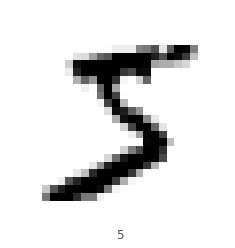

In [5]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary) #cmap converts to black and white
plt.xticks([])
plt.yticks([])
plt.xlabel(train_labels[0])
plt.show()

Each of the greyscale images in the digits dataset can be represented as a matrix. Each number within the matrix represents the pixel intensity, from 0 (white) to 255 (black). If we take a slice of the first image in our dataset, we can see the intensity of the pixels:

In [6]:
train_images[0][:10,:10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156]], dtype=uint8)

Before we load the images into a CNN model, though, we have to normalize them by rescaling the intensity to between 0 and 1.

In [7]:
train_images = train_images / 255
test_images = test_images / 255

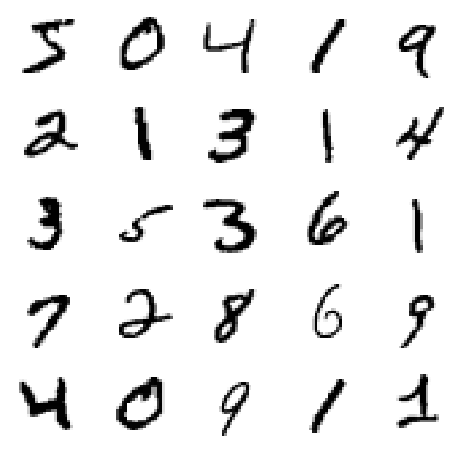

In [8]:
# show the first 25 images

plt.figure(figsize=(8,8))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

# To classify these digits, we could flatten the input and use a Fully Connected Neural Network

- Every neuron is connected to another neuron


- To classify an image, we create a unique linear combination of the pixel intensity values for each possible class. Each pixel participates exactly once in each class's linear combination. To assign probabilites to each of the classes, we pass our combinations through an activation function.


- The above^ is usually visualized as: one input layer (the pizel intensities in an image), one pre-output layer (the linear combination of pixel intensities), and one output layer (the probabilities determining the classification).

In [9]:
model = keras.Sequential()

# flattens the pixels by unstacking the rows of pixels in the image and lining them up
model.add(keras.layers.Flatten(input_shape=(28,28)))

# this layer is a 10 node bias layer that returns an array of 10 probability score 
# that sum to 1
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
model.summary()
# there are 7850 parameters because 784*10+10

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


We could also write the above code in one line like this:

`model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10, activation='softmax)])`

The next step is to compile the model:

In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# the optimizer can be changed out and experimented with
# we use sparse categorical crossentropy when there are two or more label classes
# we want to optimize for accuracy

In [12]:
model.fit(train_images, train_labels, epochs=10)
# an epoch is one run forward and backward through the data

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7222 - accuracy: 0.8083
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3115 - accuracy: 0.9137
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2842 - accuracy: 0.9205
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2711 - accuracy: 0.9257
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2685 - accuracy: 0.9257
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2614 - accuracy: 0.9276
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2594 - accuracy: 0.9290
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2499 - accuracy: 0.9312
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2490 - accuracy: 0.9321
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.247

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

print(f' The test accuracy is {round(test_acc,4)*100}')

 The test accuracy is 92.75999999999999


That accuracy is pretty good. But there's an underlying problem with fully connected neural networks: during the step of flattening the images, the structure of the pixels in the image is destroyed. Pixels that were originally close together become far apart.

Thus, the network has a difficult time detecting information by pixels originally close together. If we plot the fit weights in the fully connected network, we can see this illustrated:

In [14]:
# plot the weights from our fit fully connected network as an image
def plot_digit_weights(ax, digit):
    
    digit_weights = np.reshape(model.weights[0][:,digit], (28,28))
    ax.imshow(digit_weights, cmap=plt.cm.winter, interpolation="nearest")

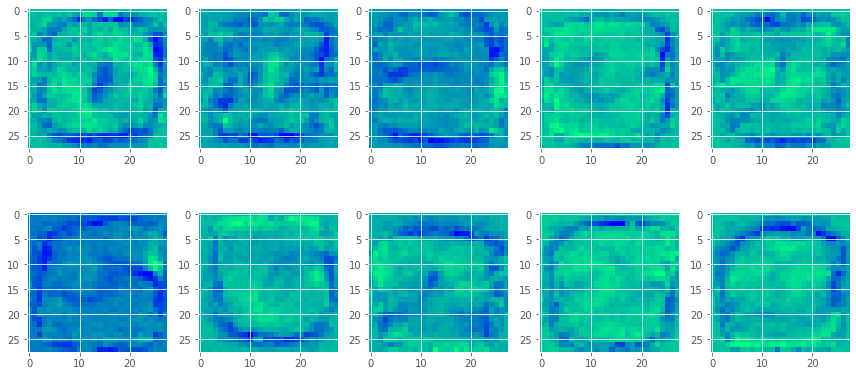

In [15]:
fig, axs = plt.subplots(2,5, figsize=(12,6))

for digit, ax in enumerate(axs.flatten()):
    plot_digit_weights(ax, digit)

plt.tight_layout()

# below, we can see that 0, 1, 2, and even 3 can be made out.
# but as the image are more complex, it becomes harder for the model to tell the digit

The fully connected network is only sensitive to the shape of the digit if they are in the same general position of the image every time. If we had an image of a 6, but positioned in the upper right hand corner, the network would not detect it.

In contrast, a CNN will learn features that can be applied anywhere in the image, which will address this issue.

# Number of Parameters

How to calculate the number of parameters we are working with:
    
    n_digit bias parameters + (n_digit * n_pixels) weight parameters
    
    10 + (10 x 28 x 28) = 7850 parameters
    
We can reduce this number with a convolutional approach

# Image Transformations: Convolutions and Pooling

The major conceptual building block of CNN's are convolutions. These are linear operations that transform an image into another image.

Imagine convolutions as a filter being applied to a matrix of numbers (a matrix) one section or "stride" at a time. The resulting outputs are the dot product, compiled into a new matrix as a "convolved feature". The stride decides how much the filter moves through the convolution.

The reason why we apply convolutions onto an image is to do feature engineering. Applying different filters give us new features that help us identify the image more accurately than just trying to view the whole image at once.

##### The Gausian Filter 
is a kind of convolution application that denoises an image. The numbers in a filter are called its activations. So in the Gaussian filter, the biggest weight is in the center and the values of the weights decrease as we move further away from the center


In [16]:
def apply_convolution_to_image(image,
                              convolutional_filter,
                              image_shape=(28,28),
                              filter_shape=(5,5)):
    
    '''applies a convolutional filter to an image. the inputs should be numpy arrays,
    and this function will take care of converting them to tensors and back'''
    
    # the image and filter tensor must be 4 tensor to use conv2d.
    # tensorflow always expects to be working on a 4 tensor; a single image can be
    # represented as a 4 tensor with shape:
    # (batch_size = 1, image_height, image_width, num_of_channel = 1)
    
    image_tensor = image.reshape(1, image_shape[0], image_shape[1], 1)
    filter_tensor = convolutional_filter.reshape(filter_shape[0], filter_shape[1], 1, 1)
    convolved_tensor = tf.nn.conv2d(input = image_tensor,
                                   filters = filter_tensor,
                                   strides = [1,1,1,1],
                                    padding = 'SAME')
    
    image_convolved = convolved_tensor[0,:,:,0]
    return image_convolved

To sum up what is happening above, we are taking an image, a filter, and using tensorflow to add a convolutional layer over the image.

In [17]:
# digit_training = train_images.reshape(-1,28,28)
first_digit_image = train_images[0]

In [18]:
gaussian_filter = (1/255) * np.array([
    [1,  4,  6,  4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1,  4,  6,  4, 1],
]).astype(np.float32)

first_digit_blurred = apply_convolution_to_image(first_digit_image, gaussian_filter)

In [19]:
def plot_convolution(original_image, filter, filter_applied, ax):
    
    fig, ax = plt.subplots(1,3, figsize=(6,6))

    ax[0].imshow(original_image)
    ax[0].set_title("Before Convolution", fontsize=11)


    ax[1].imshow(filter)
    ax[1].set_title('Gaussian Filter', fontsize=11)


    ax[2].imshow(filter_applied)
    ax[2].set_title('After Convolution', fontsize=11)

#     for i in range(3):
#         ax[i].set_xticks([])
#         ax[i].set_yticks([])


    plt.show()

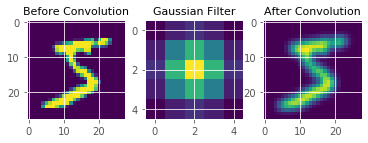

In [20]:
plot_convolution(first_digit_image, gaussian_filter, first_digit_blurred, ax)

The resulting image is called a `feature map`. 

Another Filter Important to Understanding CNN's is the: 

- **Edge Detector**

In [21]:
horizontal_edge_filter = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0],
    [-1,-1,-1,-1,-1],
    [-1,-1,-1,-1,-1]
]).astype(np.float32)

vertical_edge_filter = np.array([
    [-1, -1, 0, 1, 1],
    [-1, -1, 0, 1, 1],
    [-1, -1, 0, 1, 1],
    [-1, -1, 0, 1, 1],
    [-1, -1, 0, 1, 1]
]).astype(np.float32)


In [22]:
first_digit_h_edges = apply_convolution_to_image(first_digit_image, 
                                                 horizontal_edge_filter)

first_digit_v_edges = apply_convolution_to_image(first_digit_image, 
                                                 vertical_edge_filter)

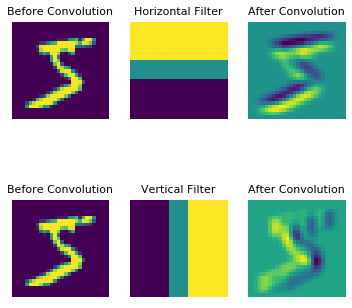

In [23]:
fig, ax = plt.subplots(2,3,figsize=(6,6))

ax[0][0].imshow(first_digit_image)
ax[0][0].set_title('Before Convolution', fontsize=11)

ax[0][1].imshow(horizontal_edge_filter)
ax[0][1].set_title('Horizontal Filter', fontsize=11)

ax[0][2].set_title('After Convolution', fontsize=11)
ax[0][2].imshow(first_digit_h_edges)


ax[1][0].imshow(first_digit_image)
ax[1][0].set_title('Before Convolution', fontsize=11)

ax[1][1].imshow(vertical_edge_filter)
ax[1][1].set_title('Vertical Filter', fontsize=11)

ax[1][2].set_title('After Convolution', fontsize=11)
ax[1][2].imshow(first_digit_v_edges)

for i in range(3):
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])
    
plt.show()

Notice that when we convolve an edge detetctor with an image, the non-edge parts of the image devolve into a sort of sludge.

If we are just looking for where there are and aren't edges, we could employ a
***Rectified Linear Unit*** to highlight these parts. 

In short, this function is called ***relu*** and will only show pixels greater than 0.

In [24]:
def apply_relu(image):
    '''applies a retified linear unit to an image'''
    
    return (np.maximum(image,0))

In [25]:
def plot_relu(image, rectified_image, axs):
    
    axs[0].imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    axs[0].set_title('Before relu')
    
    axs[1].imshow(rectified_image, cmap=plt.cm.gray_r, interpolation='nearest')
    axs[1].set_title('Rectified Image')

#     for i in range(2):
#         axs[i].set_xticks([])
#         axs[i].set_yticks([])

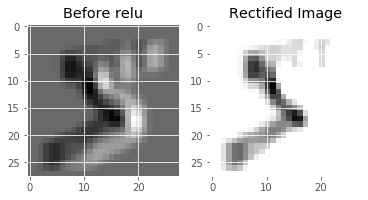

In [26]:
fig, axs = plt.subplots(1,2,figsize=(6,6))

first_digit_relu = apply_relu(first_digit_v_edges)

plot_relu(first_digit_v_edges, first_digit_relu, axs)

So what the relu function is doing here is outlining the shape of an object in an image and ignoring everything else

# Max Pooling

Another type of image transformation is **max pooling**.

In max pooling we again overlay smaller squares onto our image, but this time we tile the squares with no overlap.

The final pixel value in the output image is simply the maximum pixel value over all pixels contained in a region define by one of the small squares. This allows the next layer to look at larger spatial regions, thereby in a sense, forcing focus on the most dense parts of an image. This method also helps in reducing size and centralizing the shape of the image.

In [27]:
def apply_max_pool_to_image(image,
                           image_shape=(28,28),
                           filter_shape=(2,2)):
    
    image_tensor = image.reshape(1, image_shape[0], image_shape[1], 1)
    image_pooled_tensor = tf.nn.max_pool(
                            image_tensor,
                            ksize=[1,2,2,1],
                            strides=[1,2,2,1],
                            padding='SAME')
    image_pooled = image_pooled_tensor[0, :, :, 0]
    
    return image_pooled

In [28]:
def plot_max_pool(image, pooled_image, ax):
    
    ax[0].imshow(image)
    ax[0].set_title('Raw Image')
    
    ax[1].imshow(pooled_image)
    ax[1].set_title('Pooled Image')
    
#     for i in range(2):
#         ax[i].set_xticks([])
#         ax[i].set_yticks([])
    
    plt.show()

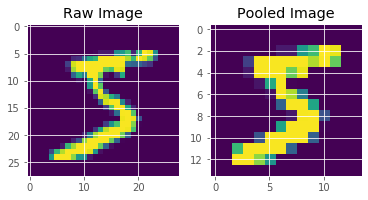

In [29]:
fig, ax = plt.subplots(1,2, figsize=(6,6))

first_digit_pooled = apply_max_pool_to_image(first_digit_image)

plot_max_pool(first_digit_image, first_digit_pooled, ax)

Max pooling has resulted in a smaller image (see scale), and displays the same content at a lower resolution

# Convolutions and max pooling have fundamentally different uses and intent

- Convolutions can be used to highlight or manipulate some structure in an image
- Max pooling simply downsamples an image to another of a smaller size

### We can typically chain multiple transformations together in a sequence:

`Convolution -> Rectified Linear Unit -> Max Pool`

Which we can think of as follows:
- the convolution identifies which regions of an image have a feature
- the rectified linear unit highlights only the region where the feature exists
- the max pooling downsamples their resulting information to save space and computation

In [30]:
# fig, ax = plt.subplots(3,3,figsize=(6,6))

# plot_convolution(first_digit_image, vertical_edge_filter, first_digit_v_edges, ax[0,:])

# plot_relu(first_digit_v_edges, first_digit_relu, ax[1,:])

# plot_max_pool(first_digit_relu, apply_max_pool_to_image(first_digit_relu),ax[2,:])

# ax[1,2].axis('off')
# ax[2,2].axis('off')


# CNN Architecture

CNN's work by dissecting an image through applying various convolutions.

During training, the network discovers appropriate convolutions that highlight features of the images which help to distinguish between the different classes we are attempting to make the model learn.

The architecture is layered like so:

               convolution      relu         pooling     convolution      pooling
       28x28  ->  5x5x16  ->  28x28x16  ->  14x14x16  ->  5x5x16x32  ->  14x14x32 ->
       
       
                            flatten
              ->  7x7x32  ->  128  ->  10
      

1. Start with 28x28 image. Since there is one image, and we have one color channel (greyscale), we can consider this a 4 tensor represented as (1, 28, 28, 1).
    - the first 1 is the ***one image***
    - the last 1 is the ***one channel***
    - formula : `(n_input_images, image_height, image_width, n_channels)`
    
    
2. Apply 16 5x5 filters. 5x5x16 means we need 16 layers of 5x5 convolutions. Each of those 16 5x5 filters will be applied to the original 28x28 image. So you end up with sixteen 28 by 28 images. The tensor would now be represented as (1, 28, 28, 16)


3. Then we add a pooling layer, which ***reduces*** the image size. So we are going to take our 28x28x16 and reduce it to 14x14, still with 16 layers.

4. After, we apply another convolution of 5x5 filters. We have 16 input images that will go the filter 32 times. So our tensor would be 5x5x16x32.

5. We add another pooling layer, which again, reduces the image size down to 14x14 with 32 layers.

We can complete all the above code through **Tensorflow**

For out first layer:

In [31]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16,(5,5), activation='relu',
                       input_shape=(28,28,1), padding="SAME"),
    
    keras.layers.MaxPooling2D((2,2))
])

In [32]:
model.summary()

# Notice the first parameter number is 416 because 16 + (16*5*5) = 416 due to:
# n_digit bias parameters + (n_digit * n_pixels) weight parameters OR
# filter_height * filter_width * input_channels * output_channels + bias

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
Total params: 416
Trainable params: 416
Non-trainable params: 0
_________________________________________________________________


* The first layer of convolutions in a well constructed CNN tend to be edge and point detectors
* The second layer in a CNN takes in the output of the first layer as its input

In [33]:
model.add(keras.layers.Conv2D(32,(5,5), activation='relu', padding='SAME'))
model.add(keras.layers.MaxPool2D(2,2))

In [34]:
model.summary()

# Notice the next parameter number is 12832 because 32 + (5*5*16*32) = 12832 due to:
# n_digit bias parameters + (n_digit * n_pixels) weight parameters OR
# filter_height * filter_width * input_channels * output_channels + bias

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
Total params: 13,248
Trainable params: 13,248
Non-trainable params: 0
_________________________________________________________________


The final fully connected layer will contain 128 final numeric features which are linear combinations of the higher level features from the second convolutional layer

In [35]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))

These 128 features are then connected to the output layer which will give us our predictions

In [36]:
model.add(keras.layers.Dense(10, activation='softmax'))

In [37]:
model.summary()

# Notice the next parameter number is 200832 because 128 + (1568*128) = 200832
# and after that,the parameter number is 1290 because 10 + (128*10) = 1290 due to:

# n_digit bias parameters + (n_digit * n_pixels) weight parameters OR
# filter_height * filter_width * input_channels * output_channels + bias

#...so we can see how in a huge NN, the parameters could easily get to be in the millions

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               200832    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

So now we understand the framework of the NN architecture, we can move onto training it, which will require us to set up a loss function. We train the network by minimizing the cross entropy loss function

In [38]:
model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# adam is a sophisticated version of stochastic gradient descent which
# adjusts the learning rate over time

# Training the Model with Tensorflow

In [39]:
train_images = train_images.reshape((60000,28,28,1))

model.fit(train_images, train_labels, epochs=10, verbose=2)

Epoch 1/10
1875/1875 - 33s - loss: 0.1335 - accuracy: 0.9584
Epoch 2/10
1875/1875 - 37s - loss: 0.0422 - accuracy: 0.9869
Epoch 3/10
1875/1875 - 34s - loss: 0.0290 - accuracy: 0.9910
Epoch 4/10
1875/1875 - 36s - loss: 0.0219 - accuracy: 0.9929
Epoch 5/10
1875/1875 - 38s - loss: 0.0165 - accuracy: 0.9946
Epoch 6/10
1875/1875 - 36s - loss: 0.0126 - accuracy: 0.9959
Epoch 7/10
1875/1875 - 35s - loss: 0.0119 - accuracy: 0.9960
Epoch 8/10
1875/1875 - 35s - loss: 0.0083 - accuracy: 0.9971
Epoch 9/10
1875/1875 - 34s - loss: 0.0088 - accuracy: 0.9970
Epoch 10/10
1875/1875 - 36s - loss: 0.0075 - accuracy: 0.9977


As we can see, after only 10 epochs, our model has given us an increase in accuracy to detect digits. Now let's try the model on our test subset.


In [40]:
test_images = test_images.reshape((10000,28,28,1))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

print(f'accuracy of test data is {round(test_acc,4)*100}%')

accuracy of test data is 99.28%


# Save your model to save run time...

Depending on the size of the data, number of parameters, and complexity of the model, it can take a long time to run a model. It makes more sense to be able to save this already fit model.

In [41]:
saved_model_path = '/home/connie/Data-Science-and-Machine-Learning-Notes/saved_models/mnist_cnn'

model.save(saved_model_path)

INFO:tensorflow:Assets written to: /home/connie/Data-Science-and-Machine-Learning-Notes/saved_models/mnist_cnn/assets


To reuse the model or further train it, we would just load the fit model:

In [54]:
# recreate the exact same model, including weights and optimizer

new_model = keras.models.load_model(saved_model_path)

new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               200832    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [56]:
test_loss, test_acc = new_model.evaluate(test_images, test_labels, verbose=0)
print(f'checking the accuracy of our saved model on the test data again: {round(test_acc, 4)*100}')

checking the accuracy of our saved model on the test data again: 99.28


# Regularization

We can see that the accuracy is pretty high. One reason could be that the dataset is simple and/or the model is great at fitting it...but it can also be due to overfitting.

Deep neural networks are prone to overfitting. The way to deal with that is by adding a layer
`tf.keras.layers.Dropout(rate)`
when you build the model. This will remove some of the nodes randomly, like in the emsembling process from random forest. The rate is the proportion of the neurons you would like to drop. 

Or, another strategy would be to add L2 regularization (lambda, absolute value. pushes all the values to 0) on all the weights in the network to prevent overfitting. This s always a good idea, and much effort in training production CNN's is spent validating the choice of this (regularization strength) and other hyperparameters.

# Visualizing the First Layer

If we wanted to take a look at the fit convolutions in the first layer of our network:

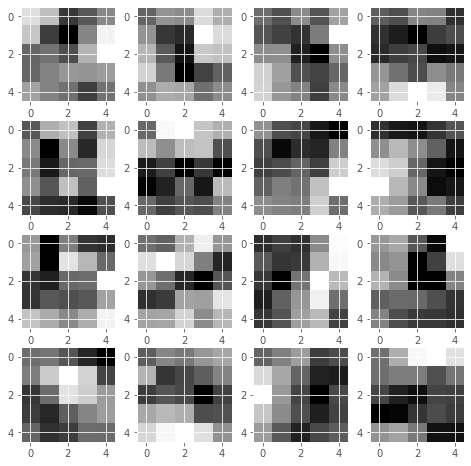

In [57]:
weights1_np = model.get_weights()[0] # 5 5 1 16

fig, ax = plt.subplots(4,4,figsize=(8,8))

for i,ax in enumerate(ax.flatten()):
    filter = weights1_np[:,:,0,i]
    ax.imshow(filter, cmap=plt.cm.gray_r, interpolation='nearest')
    

We can see how the above filters work on our digits:

In [62]:
first_digit_image.shape

(28, 28)

In [63]:
digit_five = tf.constant(first_digit_image.reshape(1,28,28,1))

digit_five_activations = tf.nn.conv2d(digit_five, weights1_np, strides=[1,1,1,1], padding='SAME')

digit_five_activations_relu = np.maximum(digit_five_activations,0)

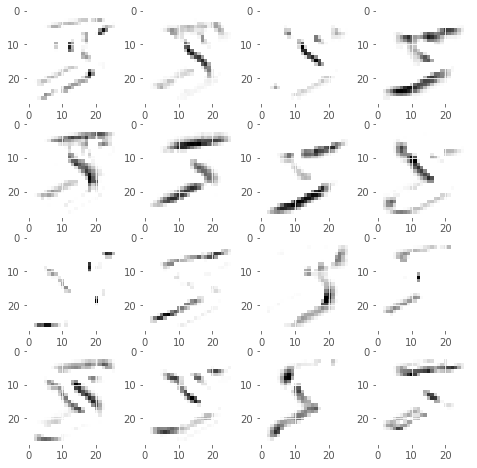

In [67]:
# and plot

fig, ax = plt.subplots(4,4,figsize=(8,8))

for i, ax in enumerate(ax.flatten()):
    ax.imshow(digit_five_activations_relu[0, :, :, i], cmap=plt.cm.gray_r, interpolation='nearest')
    
# below is what each filter detects in the digit image of 5. sometimes they make sense, sometimes they don't.
# each layer tries to do some feature engineering 

# Using the Oxford Flowers Dataset

In [42]:
flowers_path = '/home/connie/Downloads/oxford_flowers/jpg'

Test out our file path by loading in one image:

In [71]:
file_path = flowers_path + '/image_00001.jpg'
raw_image = tf.io.read_file(file_path) # reads in a single file
image = tf.image.decode_jpeg(raw_image, channels=3) # converts raw image to tensor

In [72]:
image.shape

TensorShape([500, 591, 3])

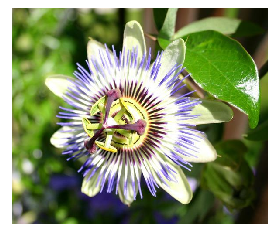

In [73]:
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

If we wanted to see the RGB channels separately:

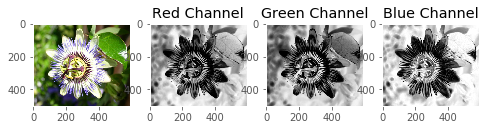

In [74]:
fig, ax = plt.subplots(1,4,figsize=(8,8))

ax[0].imshow(image)
ax[0].grid(False)

for i in range(1,4):
    ax[i].imshow(image[:,:,i-1], cmap=plt.cm.binary)
    ax[i].set_title("{} Channel".format(['Red', 'Green', 'Blue'][i-1]))
    ax[i].grid(False)
    
plt.show()

We've confirmed our images load in. Now let's repeat the process of loading, decoding, and normalizing our images all at one time through a function.

`tf.data.Dataset.from_tensor_slices` is the simplest way to create a dataset from a python list.

In [75]:
# def preprocess_image(image):
#     image = tf.image.decode_jpeg(image, channels=3)
#     image = tf.image.resize(image, [192,192])
#     image /= 255 
    
#     return image


# def load_and_preprocess_image(path):
#     image = tf.io.read_file(path)
#     return preprocess_image(image)


In [76]:
# just combine the above two into one function

def load_and_preprocess_image_combined(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [192,192])
    image /= 255 
    
    return image

In [77]:
n_flower_images = 8189

flower_filenames = [flowers_path + '/image_{:05d}.jpg'.format(i)
                   for i in range(1,n_flower_images+1)]

flower_filenames[:5]

['/home/connie/Downloads/oxford_flowers/jpg/image_00001.jpg',
 '/home/connie/Downloads/oxford_flowers/jpg/image_00002.jpg',
 '/home/connie/Downloads/oxford_flowers/jpg/image_00003.jpg',
 '/home/connie/Downloads/oxford_flowers/jpg/image_00004.jpg',
 '/home/connie/Downloads/oxford_flowers/jpg/image_00005.jpg']

In [78]:
# turns the python list of flower images into a dataset
path_ds = tf.data.Dataset.from_tensor_slices(flower_filenames)

In [79]:
# call our load and preprocess function
image_ds = path_ds.map(load_and_preprocess_image_combined, num_parallel_calls=AUTOTUNE)

In [80]:
# our processed image dataset is now in image_ds
type(image_ds), len(image_ds)

(tensorflow.python.data.ops.dataset_ops.ParallelMapDataset, 8189)

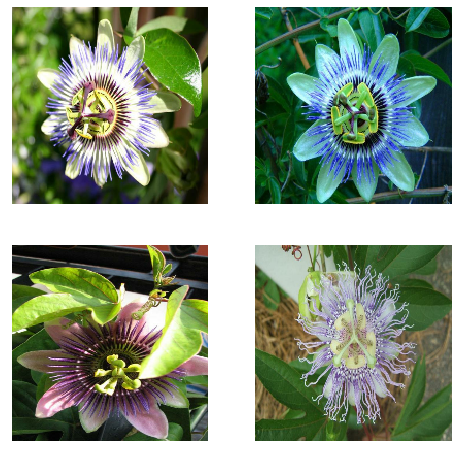

In [81]:
# grabbing 4 images from image_ds to take a look

plt.figure(figsize=(8,8))

for n,image in enumerate(image_ds.take(4)):
    plt.subplot(2,2,n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])